In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
df.shape

(891, 12)

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
null_values = df.isnull()

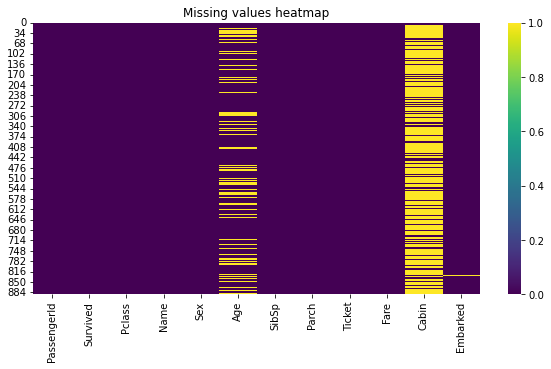

In [15]:
plt.figure(figsize = (10,5))
sns.heatmap(data = null_values, cmap = 'viridis').set_title("Missing values heatmap");

In [16]:
df.dropna(subset = 'Embarked', inplace = True)

In [17]:
df['Age'].fillna(df['Age'].median(),inplace = True)

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

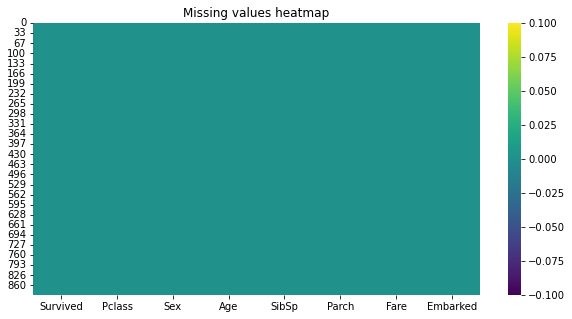

In [20]:
null_val = df.isnull()
plt.figure(figsize = (10,5))
sns.heatmap(data = null_val, cmap = 'viridis').set_title("Missing values heatmap");

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


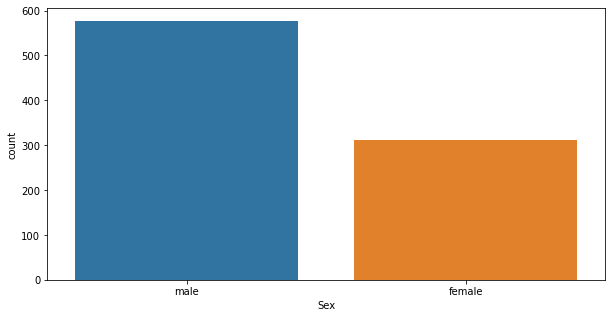

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Sex');

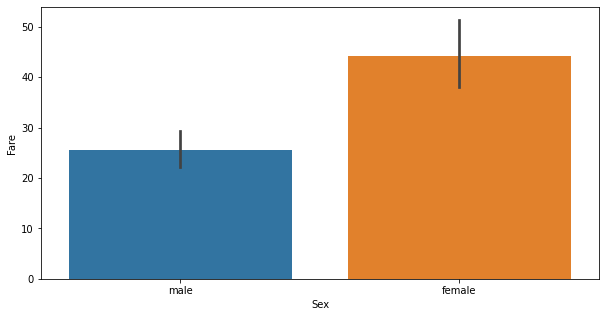

In [23]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = 'Sex', y = 'Fare');

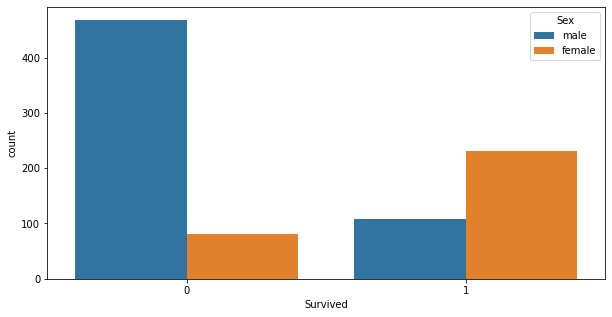

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Survived', hue = 'Sex');

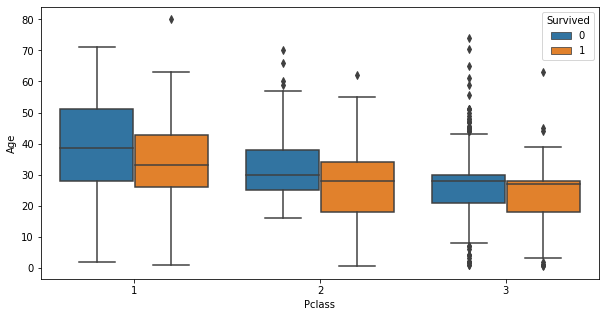

In [25]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'Pclass', y = 'Age', hue = 'Survived');

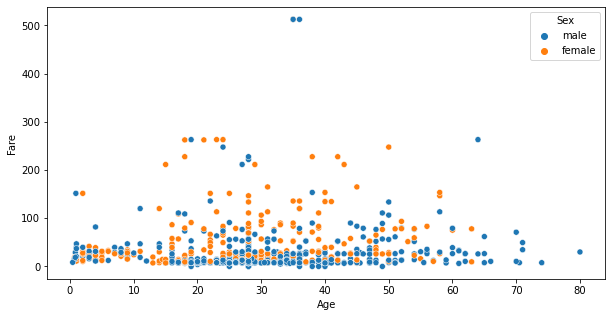

In [26]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df, x = 'Age', y = 'Fare', hue = 'Sex');

<Figure size 720x360 with 0 Axes>

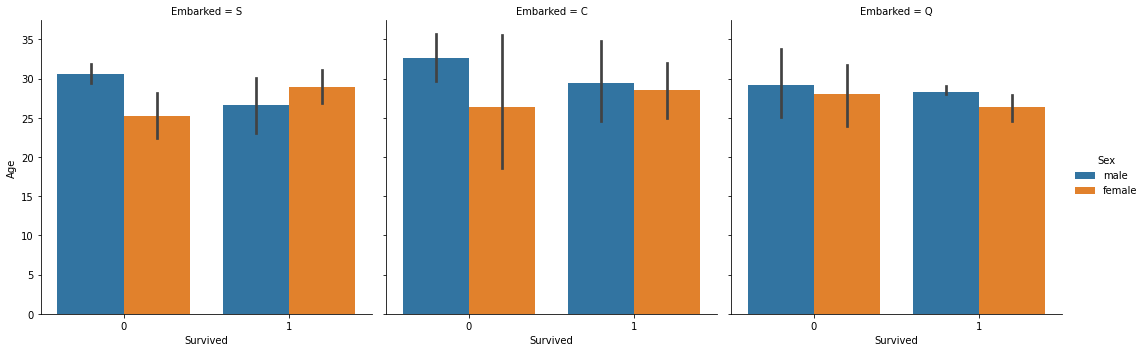

In [27]:
plt.figure(figsize = (10,5))
sns.catplot(data = df, x = 'Survived', y = 'Age', hue = 'Sex', col = 'Embarked', kind = 'bar');

In [28]:
df['Pclass'] = np.array(df['Pclass'], dtype = 'str')

In [29]:
obj = df.select_dtypes(include = 'object')
num = df.select_dtypes(exclude = 'object')

In [30]:
obj_val = pd.get_dummies(obj, drop_first = True)

In [31]:
df_titanic = pd.concat([obj_val, num], axis = 1)

In [32]:
df_titanic

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived,Age,SibSp,Parch,Fare
0,0,1,1,0,1,0,22.0,1,0,7.2500
1,0,0,0,0,0,1,38.0,1,0,71.2833
2,0,1,0,0,1,1,26.0,0,0,7.9250
3,0,0,0,0,1,1,35.0,1,0,53.1000
4,0,1,1,0,1,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,1,0,27.0,0,0,13.0000
887,0,0,0,0,1,1,19.0,0,0,30.0000
888,0,1,0,0,1,0,28.0,1,2,23.4500
889,0,0,1,0,0,1,26.0,0,0,30.0000


In [33]:
X = df_titanic.drop('Survived', axis = 1)

In [34]:
y = df_titanic['Survived']

In [183]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size = 0.2, random_state= 101)

In [184]:
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size = 0.5, random_state= 101)

In [185]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_eval = scaler.transform(X_eval)

In [186]:
grid_model = RandomForestClassifier()

In [219]:
param_grid = {'max_depth': [3, 4, 5, 6, 7, 1, 0, 8], 'random_state' : [0,20, 42, 50, 70, 80, 101]}

In [220]:
my_model = GridSearchCV(estimator = grid_model, param_grid = param_grid, cv = 5)

In [221]:
my_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 1, 0, 8],
                         'random_state': [0, 20, 42, 50, 70, 80, 101]})

In [222]:
my_model.best_estimator_

RandomForestClassifier(max_depth=8, random_state=42)

In [223]:
model_rand = RandomForestClassifier(max_depth=8,random_state=42)
model_rand.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [224]:
rand_pred = model_rand.predict(X_eval)
score_1 = accuracy_score(y_eval, rand_pred)*100
score_2 = mean_absolute_error(y_eval, rand_pred)
score_3 = classification_report(y_eval, rand_pred)

In [225]:
rand_pred_unseen = model_rand.predict(X_test)
score_a = accuracy_score(y_test, rand_pred_unseen)*100
score_b = mean_absolute_error(y_test, rand_pred_unseen)
score_c = classification_report(y_test, rand_pred_unseen)

In [226]:
scores = {'Models': ['Randfreg_seen_data', 'Randomfreg_unseen_data'],
          'Acuracy Scores': [score_1, score_a],
          'Absolute error': [score_2, score_b]}
tit_acc = pd.DataFrame(scores)

In [227]:
tit_acc

,Models,Acuracy Scores,Absolute error
0,Randfreg_seen_data,84.269663,0.157303
1,Randomfreg_unseen_data,85.393258,0.146067


In [228]:
print(score_3, score_c)

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        52
           1       0.90      0.70      0.79        37

    accuracy                           0.84        89
   macro avg       0.86      0.82      0.83        89
weighted avg       0.85      0.84      0.84        89
               precision    recall  f1-score   support

           0       0.84      0.95      0.89        55
           1       0.89      0.71      0.79        34

    accuracy                           0.85        89
   macro avg       0.86      0.83      0.84        89
weighted avg       0.86      0.85      0.85        89

